In [1]:
from model_phantom import *

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


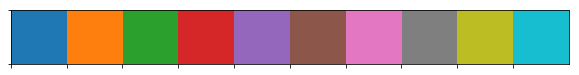

In [3]:
#Palettes
print(sns.color_palette("tab10").as_hex())
sns.palplot(sns.color_palette("tab10"))
plt.show()
c_on = 'darkorange' #'#ff7f0e'
c_off = 'dodgerblue' #'#1f77b4'

onoff_pal=[c_on, c_off]
offon_pal = [c_off, c_on]

pal_cyan = sns.color_palette("RdBu_r", n_colors=200)[40:] #RdBu_r
ltc= 'gold'  #'springgreen'
lw_t=3
N=512
stimon = 50
stimoff = 50 + floor(250/2) ;
nsteps=int(floor(750));
p_targ2 = int((N * 90)/360)
p_dist = int((N * (90+50) )/360)
sns.set_context("poster", font_scale=1.1)
sns.set_style("ticks")

In [4]:
def hemap(an):
    RE_sorted=flipud(an[4])
    sns.heatmap(RE_sorted, cmap=pal_cyan, vmin=0, vmax=17,  cbar=True)
    plt.gca().set_ylabel('')
    plt.gca().set_xlabel('')
    plt.gca().set_title('')
    plt.gca().plot([stimon, nsteps], [p_targ2, p_targ2], ls='--', color =ltc, linewidth=lw_t) ## flipped, so it is p_target 
    plt.gca().set_xticks([])
    plt.gca().set_yticks([0, N/4, N/2,  3*N/4, N ])
    plt.gca().set_yticklabels(['0','90','180', '270', '360'])
    plt.gca().set_xlabel('time');

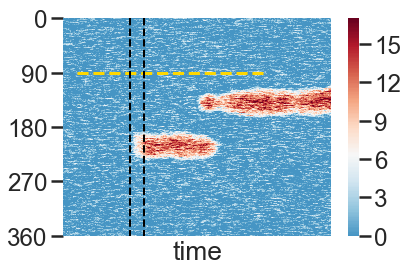

In [29]:
fee=1
fei=1
fie=1
fii=1

fee=0.94
fei=0.92
fie=1.14
fii=1.08

on= model(totalTime=2000, targ_onset_1=50000, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=52, tauE=20, tauI=10,  n_stims=2, I0E=0.1, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=8., sigI=5.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=2.5, phantom_onset=500, phnatom_duration=100)


hemap(on)
plt.plot([500/2, 500/2], [0, 512], '--k', linewidth=2) ## flipped, so it is p_target 
plt.plot([600/2, 600/2], [0, 512], '--k', linewidth=2)

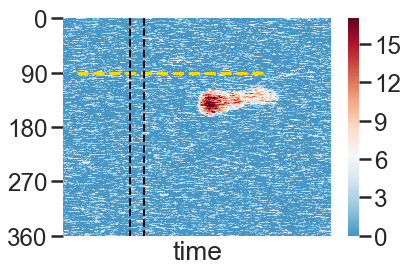

In [31]:
on= model(totalTime=2000, targ_onset_1=50000, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=52, tauE=20, tauI=10,  n_stims=2, I0E=-2.5, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=10., sigI=5.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=2.5, phantom_onset=500, phnatom_duration=100)


hemap(on)
plt.plot([500/2, 500/2], [0, 512], '--k', linewidth=2) ## flipped, so it is p_target 
plt.plot([600/2, 600/2], [0, 512], '--k', linewidth=2)